In [1]:
import cv2
import numpy as np
import jupyter_cv_utils as jutils

In [5]:
img = cv2.imread("/home/sp/Downloads/SW2HW.png", cv2.IMREAD_UNCHANGED)

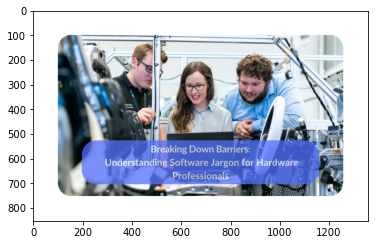

In [6]:
jutils.imshow(img)

In [83]:
def remove_padded_edges(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold image to create a binary mask
    _, mask = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

    mask_inv = cv2.bitwise_not(mask)

    kernel = np.ones((15,15),np.uint8)

    closing = cv2.morphologyEx(mask_inv, cv2.MORPH_CLOSE, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(largest_contour)

    cropped_image = img[y:y+h, x:x+w]

    return cropped_image

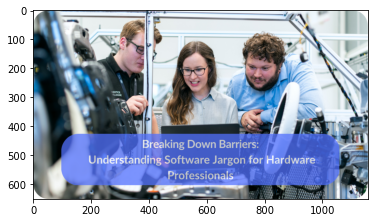

In [80]:
jutils.imshow(cropped_image)

In [82]:
cv2.imwrite("sw_to_hw.jpg", cropped_image)

True